In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as iter
from progressbar import ProgressBar

/ |  #                                            | 17282 Elapsed Time: 0:00:00

33554432


\ |                   #                        | 33551245 Elapsed Time: 0:06:25

CPU times: user 8min 2s, sys: 21.4 s, total: 8min 24s
Wall time: 8min 11s


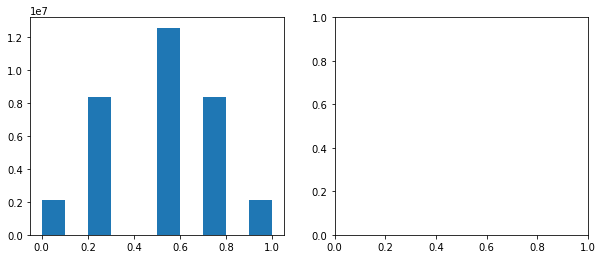

In [5]:
%%time
## INPUT
p_comb = [0, 1]
a_comb = [1]
binalize = False
threshold = 0.5 #where val > threshold, then val = 1


total_comb = len( p_comb ) ** 25 * len( a_comb ) ** 4
print(total_comb)
p_matrix = np.empty((total_comb, 25), dtype='int8')
q_matrix = np.empty((total_comb, 16), dtype='float16')
count = 0
p = ProgressBar(total_comb)

for p_11, p_12, p_13, p_14, p_15, p_21, p_22, p_23, p_24, p_25, p_31, p_32, p_33, p_34, p_35, p_41, p_42, p_43, p_44, p_45, p_51, p_52, p_53, p_54, p_55 in iter.product(p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb, p_comb):
    for a_11, a_12, a_21, a_22 in iter.product(a_comb, a_comb, a_comb, a_comb):
        q_matrix[count] = np.array([
            p_11 * a_11 + p_12 * a_12 + p_21 * a_21 + p_22 * a_22,
            p_12 * a_11 + p_13 * a_12 + p_22 * a_21 + p_23 * a_22,
            p_13 * a_11 + p_14 * a_12 + p_23 * a_21 + p_24 * a_22,                      
            p_14 * a_11 + p_15 * a_12 + p_24 * a_21 + p_25 * a_22,                      
            p_21 * a_11 + p_22 * a_12 + p_31 * a_21 + p_32 * a_22,
            p_22 * a_11 + p_23 * a_12 + p_32 * a_21 + p_33 * a_22,
            p_23 * a_11 + p_24 * a_12 + p_33 * a_21 + p_34 * a_22,
            p_24 * a_11 + p_25 * a_12 + p_34 * a_21 + p_35 * a_22,
            p_31 * a_11 + p_32 * a_12 + p_41 * a_21 + p_42 * a_22,
            p_32 * a_11 + p_33 * a_12 + p_42 * a_21 + p_43 * a_22,
            p_33 * a_11 + p_34 * a_12 + p_43 * a_21 + p_44 * a_22,
            p_34 * a_11 + p_35 * a_12 + p_44 * a_21 + p_45 * a_22,
            p_41 * a_11 + p_42 * a_12 + p_51 * a_21 + p_52 * a_22,
            p_42 * a_11 + p_43 * a_12 + p_52 * a_21 + p_53 * a_22,
            p_43 * a_11 + p_44 * a_12 + p_53 * a_21 + p_54 * a_22,
            p_44 * a_11 + p_45 * a_12 + p_54 * a_21 + p_55 * a_22
            ],dtype="float16")
        p_matrix[count] = np.array([p_11, p_12, p_13, p_14, p_15, p_21, p_22, p_23, p_24, p_25, p_31, p_32, p_33, p_34, p_35, p_41, p_42, p_43, p_44, p_45, p_51, p_52, p_53, p_54, p_55])
        count += 1
        p.update(count + 1)
q_matrix /= 4

## PLOTTING
fig, axes = plt.subplots(1,2, figsize = (10,4))
hist_data = [q_matrix[i][1] for i in range(q_matrix.shape[0])]
axes[0].hist(hist_data)
if binalize == True:
    q_matrix[q_matrix < threshold] = 0
    q_matrix[q_matrix >= threshold] = 1
    hist_data_binalize = [q_matrix[i][1] for i in range(q_matrix.shape[0])]
    axes[1].hist(hist_data_binalize)
    
np.savez_compressed('5x5matrix', p_matrix = p_matrix, q_matrix = q_matrix)

In [44]:
combinations = int(2**25 * (2 ** 4))
p_matrix = np.empty((combinations, 25), dtype='float16')
q_matrix = np.empty((combinations, 16), dtype='float16')
p_count = 0
count = 0
p = ProgressBar(combinations - 1)

for p_11, p_12, p_13, p_14, p_15, p_21, p_22, p_23, p_24, p_25, p_31, p_32, p_33, p_34, p_35, p_41, p_42, p_43, p_44, p_45, p_51, p_52, p_53, p_54, p_55 in iter.product([0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]):
    p_matrix[p_count * (2 ** 4) : (p_count + 1) * (2 ** 4)] = np.array([p_11, p_12, p_13, p_14, p_15, p_21, p_22, p_23, p_24, p_25, p_31, p_32, p_33, p_34, p_35, p_41, p_42, p_43, p_44, p_45, p_51, p_52, p_53, p_54, p_55])
    p_count += 1
    for a_11, a_12, a_21, a_22 in iter.product([0.5,1],[0.5,1],[0.5,1],[0.5,1]):
        q_matrix[count] = np.array([
            p_11 * a_11 + p_12 * a_12 + p_21 * a_21 + p_22 * a_22,
            p_12 * a_11 + p_13 * a_12 + p_22 * a_21 + p_23 * a_22,
            p_13 * a_11 + p_14 * a_12 + p_23 * a_21 + p_24 * a_22,                      
            p_14 * a_11 + p_15 * a_12 + p_24 * a_21 + p_25 * a_22,                      
            p_21 * a_11 + p_22 * a_12 + p_31 * a_21 + p_32 * a_22,
            p_22 * a_11 + p_23 * a_12 + p_32 * a_21 + p_33 * a_22,
            p_23 * a_11 + p_24 * a_12 + p_33 * a_21 + p_34 * a_22,
            p_24 * a_11 + p_25 * a_12 + p_34 * a_21 + p_35 * a_22,
            p_31 * a_11 + p_32 * a_12 + p_41 * a_21 + p_42 * a_22,
            p_32 * a_11 + p_33 * a_12 + p_42 * a_21 + p_43 * a_22,
            p_33 * a_11 + p_34 * a_12 + p_43 * a_21 + p_44 * a_22,
            p_34 * a_11 + p_35 * a_12 + p_44 * a_21 + p_45 * a_22,
            p_41 * a_11 + p_42 * a_12 + p_51 * a_21 + p_52 * a_22,
            p_42 * a_11 + p_43 * a_12 + p_52 * a_21 + p_53 * a_22,
            p_43 * a_11 + p_44 * a_12 + p_53 * a_21 + p_54 * a_22,
            p_44 * a_11 + p_45 * a_12 + p_54 * a_21 + p_55 * a_22
            ])
        count += 1
        p.update(count + 1)            
q_matrix[q_matrix <= 1] = 0
q_matrix[q_matrix > 1] = 1

/ |      #                                    | 536867378 Elapsed Time: 1:05:56

In [45]:
%time np.savez_compressed('5x5matrix', p_matrix = p_matrix, q_matrix = q_matrix)

CPU times: user 8min 59s, sys: 1min 28s, total: 10min 28s
Wall time: 11min 41s
